In [1]:
import numpy as np
import scipy.linalg as sl
import matplotlib.pyplot as plt

### Round-Off Error in Initial Conditions and the Problems it causes
Let us consider a matrix $A$ defined as
$$
    A = \begin{bmatrix}
        1.1 & 0 \\
        0 & 1
    \end{bmatrix}
$$
This is a simple diagional matrix with eigenvalues $\lambda_1 = 1.1,~\lambda_2 = 1$ and the corresponding eigenvectors
$$
    x_1 = \begin{bmatrix}
        1 \\ 0
    \end{bmatrix}
    \qquad
    x_2 = \begin{bmatrix}
        0 \\ 1
    \end{bmatrix}
$$

Let us now consider the power-method, defined as multiplying $A$ repeatedly to a vector $x$ followed by normalising.
Then any vector $x = \alpha_1 x_1 + \alpha_2 x_2$ with $\alpha_1 \neq 0$ will converge towards $x_1$.
Indeed, we have
$$
    \lim_{n \longrightarrow \infty} \frac{A^n x}{||A^n x||} 
    = \lim_{n \longrightarrow \infty} \frac{\alpha_1 \lambda_1^n x_1 + \alpha_2 \lambda_2^n x_2}{||\alpha_1 \lambda_1^n x_1 + \alpha_2 \lambda_2^n x_2||}
    = x_1 + \lim_{n \longrightarrow \infty}  \frac{\frac{\alpha_2}{\alpha_1} (\frac{\lambda_2}{\lambda_1})^n x_2}{||x_1 + \frac{\alpha_2}{\alpha_1} (\frac{\lambda_2}{\lambda_1})^n x_2||}
    = x_1
$$
because by construction $\lambda_1 > \lambda_2 \Rightarrow \lim_{n \longrightarrow \infty} (\frac{\lambda_2}{\lambda_1})^n = 0$.

We note that it does not matter how small $\alpha_1$ is, as long as it is non-zero a convergence to $x_1$ will occur.
This is especially important for results of any numerical computation as any numerical result typically has round-off errors.
Let us test this now numerically below by starting from a state numerically close to $x_2$.

x = [1.e-18 1.e+00] (Note that due to round-off, the computer considers this to be ||x||=1)


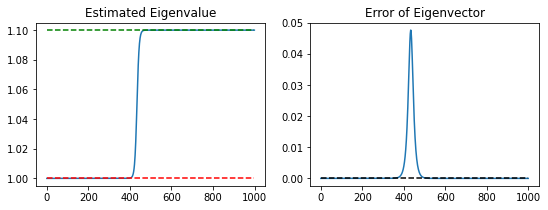

In [2]:
A = np.array([[1.1, 0], [0, 1]])
x1 = np.array([1, 0])
x2 = np.array([0, 1])

# Initial guess: Pretty much x2!
x = np.array([1e-18, 1])
x /= np.linalg.norm(x)
print(f"x = {x} (Note that due to round-off, the computer considers this to be ||x||=1)")

e = np.zeros(1000)  # Eigenvalues for plotting
err = np.zeros(e.shape)  # Error as eigenvector
for i in range(len(e)):
    # Power method
    x = np.matmul(A, x)
    x /= np.linalg.norm(x)

    e[i] = np.inner(x, np.matmul(A, x))
    err[i] = np.linalg.norm(np.matmul(A, x)-e[i]*x)/abs(e[i])

fig, axes = plt.subplots(1, 2, figsize=(9, 3))
# Eigenvalue
axes[0].plot(e)
axes[0].set_title("Estimated Eigenvalue")
axes[0].plot(1*np.ones(e.shape), '--r')
axes[0].plot(1.1*np.ones(e.shape), '--g')
# Error of eigenvector
axes[1].plot(err)
axes[1].plot(1e-15*np.ones(err.shape), '--k')
axes[1].set_title("Error of Eigenvector")
plt.show()

We may note that initially we stayed close to $x_2$ but then suddenly jumped to $x_1$!
The reason for this jump is the exponential nature of the power-method: $(\frac{\lambda_2}{\lambda_1})^n$.
But wait, we set the error explicitely.
Is this really an issue in a real examples?
Yes! Let us try a more realistic examples.

Consider the matrix $B$ defined as
$$
    B = \exp\Big(\begin{bmatrix}
        -2 & -1 \\
        -1 & -2
    \end{bmatrix}\Big)
$$
Here, the eigenvalues and eigenvectors are harder to find. 
Luckily, we can use a built-in function instead of doing it by hand.
Again, we set as the initial vector $y$ the numerical eigenvector $\hat{y}_1$ with a smaller eigenvalue.
Let us see what happens:

lambda_1 = 0.3678794411714421, lambda_2 = 0.049787068367863875


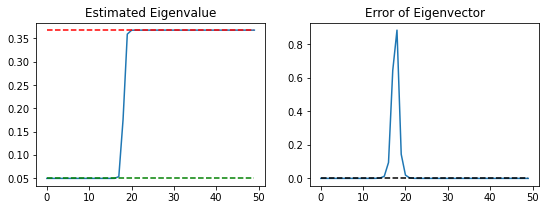

In [3]:
B = sl.expm(np.array([[-2, -1], [-1, -2]]))
Beig = np.linalg.eig(B)  # Built-in function
l1, l2 = Beig[0]
print(f"lambda_1 = {l1}, lambda_2 = {l2}")
y1 = Beig[1][:,0]
y2 = Beig[1][:,1]

# Starting guess identical with numerical eigenvalue!
y = y1 if l1 < l2 else y2
y /= np.linalg.norm(x)

e = np.zeros(50)
err = np.zeros(e.shape)
for i in range(len(e)):
    y = np.matmul(B, y)
    y /= np.linalg.norm(y)
    e[i] = np.inner(y, np.matmul(B, y))
    err[i] = np.linalg.norm(np.matmul(B, y)-e[i]*y)/abs(e[i])

fig, axes = plt.subplots(1, 2, figsize=(9, 3))
# Eigenvalue
axes[0].plot(e)
axes[0].set_title("Estimated Eigenvalue")
axes[0].plot(l1*np.ones(e.shape), '--r')
axes[0].plot(l2*np.ones(e.shape), '--g')
# Error of eigenvector
axes[1].plot(err)
axes[1].plot(1e-15*np.ones(err.shape), '--k')
axes[1].set_title("Error of Eigenvector")
plt.show()

Again, we see a jump to the largest eigenvalue despite the fact that we started with the other eigenvector!
The reason is simple: The result of a numerical calculation is affected by round-off and this round-off has contributions of the other eigenvectors.

How does this relate to the split-operator and imaginary time?
Given a fixed Hamiltonian as in the case of the Schrödinger equation, the discretization leads us to a matrix vector problem with the vector being the wavefunction.
In the split-operator method we then proceed to multiply the matrix repeatedly until we converge to the ground-state.
But that is nothing else than the power-method described above!
In other words, the imaginary time evolution is simply the power-method and thus exactly as the problem we saw above.

(Wait, isn't the ground-state the lowest energy?
Yes, but we take the negative exponential of it, making it the largest eigenvalue.
In particular, the power-method as described above can only find the largest eigenvalue.)